## 2024 Global Crime Rate Analysis
**In this notebook, we will analyze the "2024 Crime Rate by Country" dataset using various visualization techniques.**

In [42]:
# Importing Library for Data Analysis and Manipulation
import pandas as pd

# Importing Libraries for Visualization
import matplotlib.pyplot as plt  # For basic plots 
import seaborn as sns  # For statistical data visualization 

# Import Library for handling geospatial data
import geopandas as gpd

# Import Library for clustering
from sklearn.cluster import KMeans

# Enabling Plotly in Kaggle Notebook 
from plotly.offline import init_notebook_mode  
init_notebook_mode(connected=True)  # Ensures Plotly visualizations work in Kaggle

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Load and Preview Data
**Before going to analysis, we need to understand the structure of the dataset by loading and checking it.**

In [17]:
# Load the dataset
df = pd.read_csv('/kaggle/input/global-crime-rates-analysis-a-2024-overview/crime_rate_by_country_2024.csv')

# Preview the first and last five rows 
display(df.head())
display(df.tail())

,Country,CrimeIndex,CriminalityScore,MarketsScore,ActorsScore,ResilienceScore,SafetyIndex
0,India,44.4,5.75,6.70,4.8,5.42,55.6
1,China,60.8,6.37,6.53,6.2,5.67,39.2
2,United States,49.2,5.67,5.83,5.5,7.13,50.8
3,Indonesia,45.9,6.85,6.60,7.1,4.25,54.1
4,Pakistan,42.8,6.03,6.27,5.8,3.96,57.2


,Country,CrimeIndex,CriminalityScore,MarketsScore,ActorsScore,ResilienceScore,SafetyIndex
193,San Marino,45.768774,3.48000,2.370000,4.600000,5.210000,54.237143
194,Palau,45.768774,2.70000,2.900000,2.500000,5.330000,54.237143
195,Nauru,45.768774,2.05000,2.200000,1.900000,5.000000,54.237143
196,Tuvalu,45.768774,1.62000,1.930000,1.300000,6.080000,54.237143
197,Total,46.597188,5.03099,4.876823,5.184896,4.827031,54.237143


In [14]:
# Display the structure and summary of the data
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           198 non-null    object 
 1   CrimeIndex        198 non-null    float64
 2   CriminalityScore  198 non-null    float64
 3   MarketsScore      198 non-null    float64
 4   ActorsScore       198 non-null    float64
 5   ResilienceScore   198 non-null    float64
 6   SafetyIndex       198 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.0+ KB

Missing Values:
Country             0
CrimeIndex          0
CriminalityScore    0
MarketsScore        0
ActorsScore         0
ResilienceScore     0
SafetyIndex         0
dtype: int64


**The dataset contains multiple columns including country, crime index, criminality score, market score, actors score, resilience score, and safety index.**<br>
**No missing values based on the checked result.**

## 2. Data formatting and Consistency
**We will standardize all float values to one decimal place using the round method to ensure consistency.**

In [18]:
# Round the data to one decimal place
df = df.round(1)

# Preview the first and last five rows 
display(df.head())
display(df.tail())

,Country,CrimeIndex,CriminalityScore,MarketsScore,ActorsScore,ResilienceScore,SafetyIndex
0,India,44.4,5.8,6.7,4.8,5.4,55.6
1,China,60.8,6.4,6.5,6.2,5.7,39.2
2,United States,49.2,5.7,5.8,5.5,7.1,50.8
3,Indonesia,45.9,6.8,6.6,7.1,4.2,54.1
4,Pakistan,42.8,6.0,6.3,5.8,4.0,57.2


,Country,CrimeIndex,CriminalityScore,MarketsScore,ActorsScore,ResilienceScore,SafetyIndex
193,San Marino,45.8,3.5,2.4,4.6,5.2,54.2
194,Palau,45.8,2.7,2.9,2.5,5.3,54.2
195,Nauru,45.8,2.0,2.2,1.9,5.0,54.2
196,Tuvalu,45.8,1.6,1.9,1.3,6.1,54.2
197,Total,46.6,5.0,4.9,5.2,4.8,54.2


## 3. Exploratory Data Analysis
### 3.1 Bivariate Analysis
**Exploratory Data Analysis plays a key role in uncovering underlying patterns and relationships within the dataset. In this section, we will perform bivariate analyses, specifically focusing on the relationships between CrimeIndex and ResilienceScore, CriminalityScore and SafetyIndex, and MarketsScore and SafetyIndex. These analyses will help us gain deeper insights into how these variables interact and provide a clearer understanding of potential correlations in the data.**

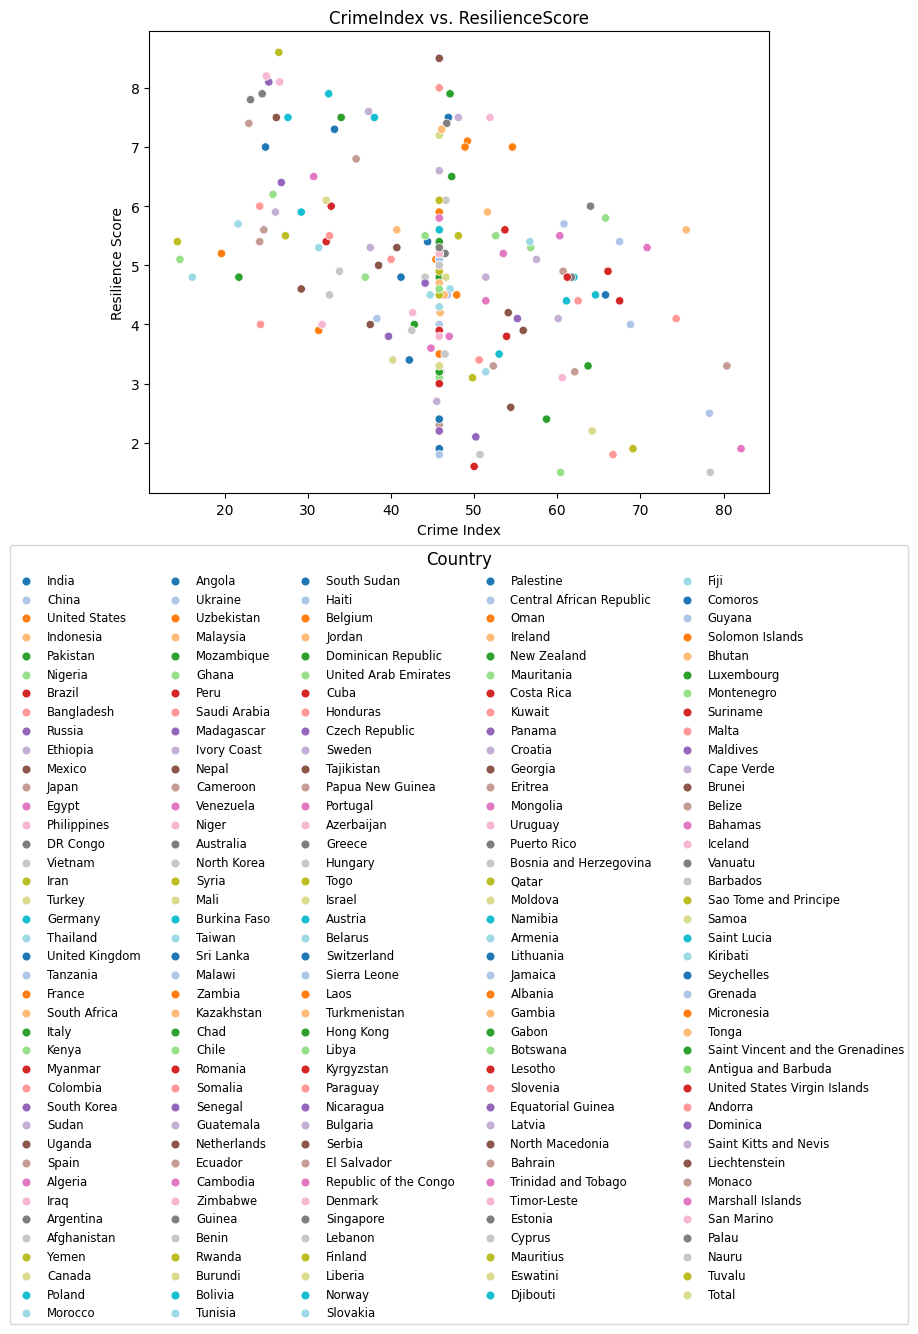

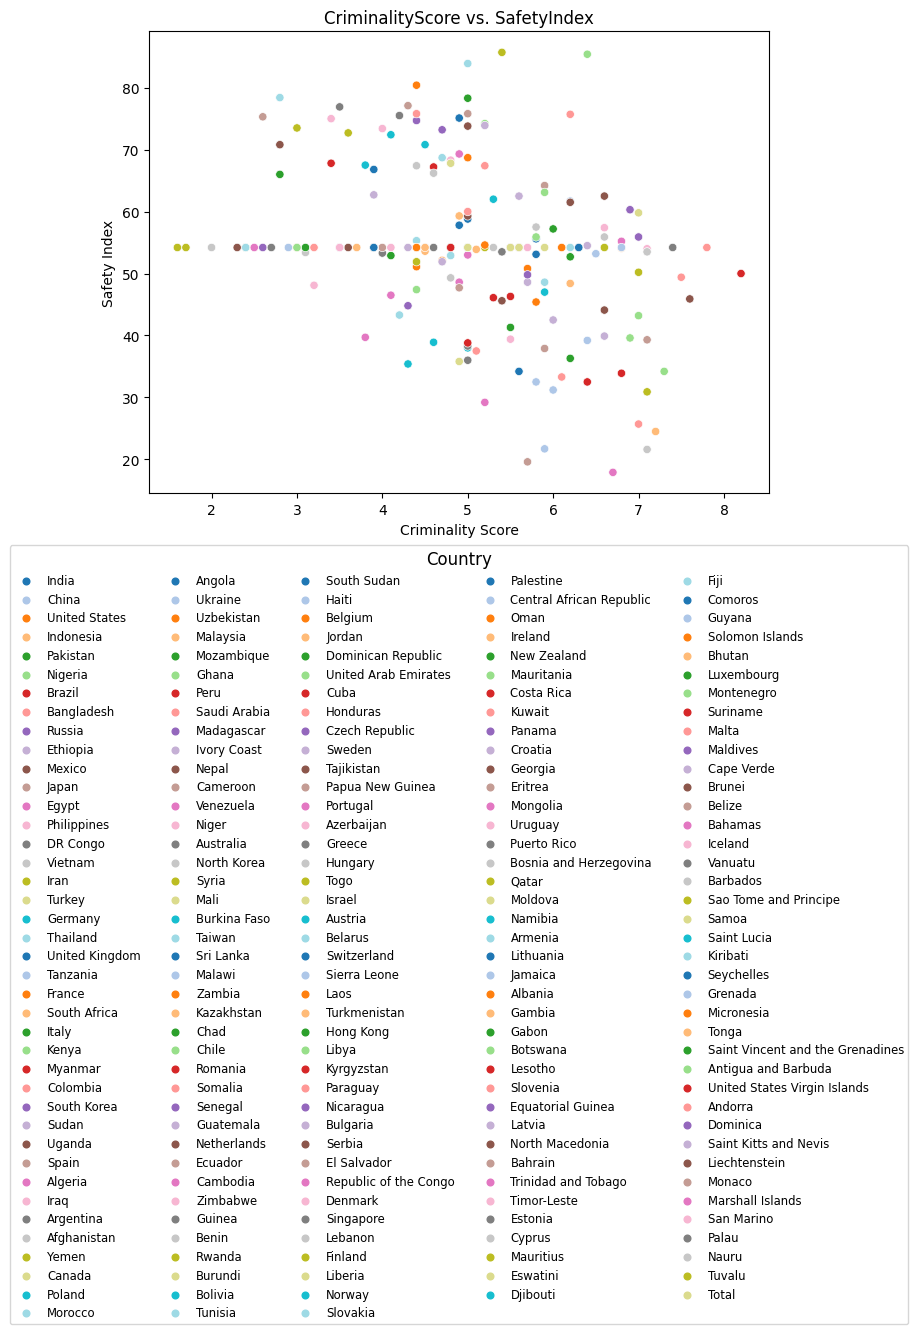

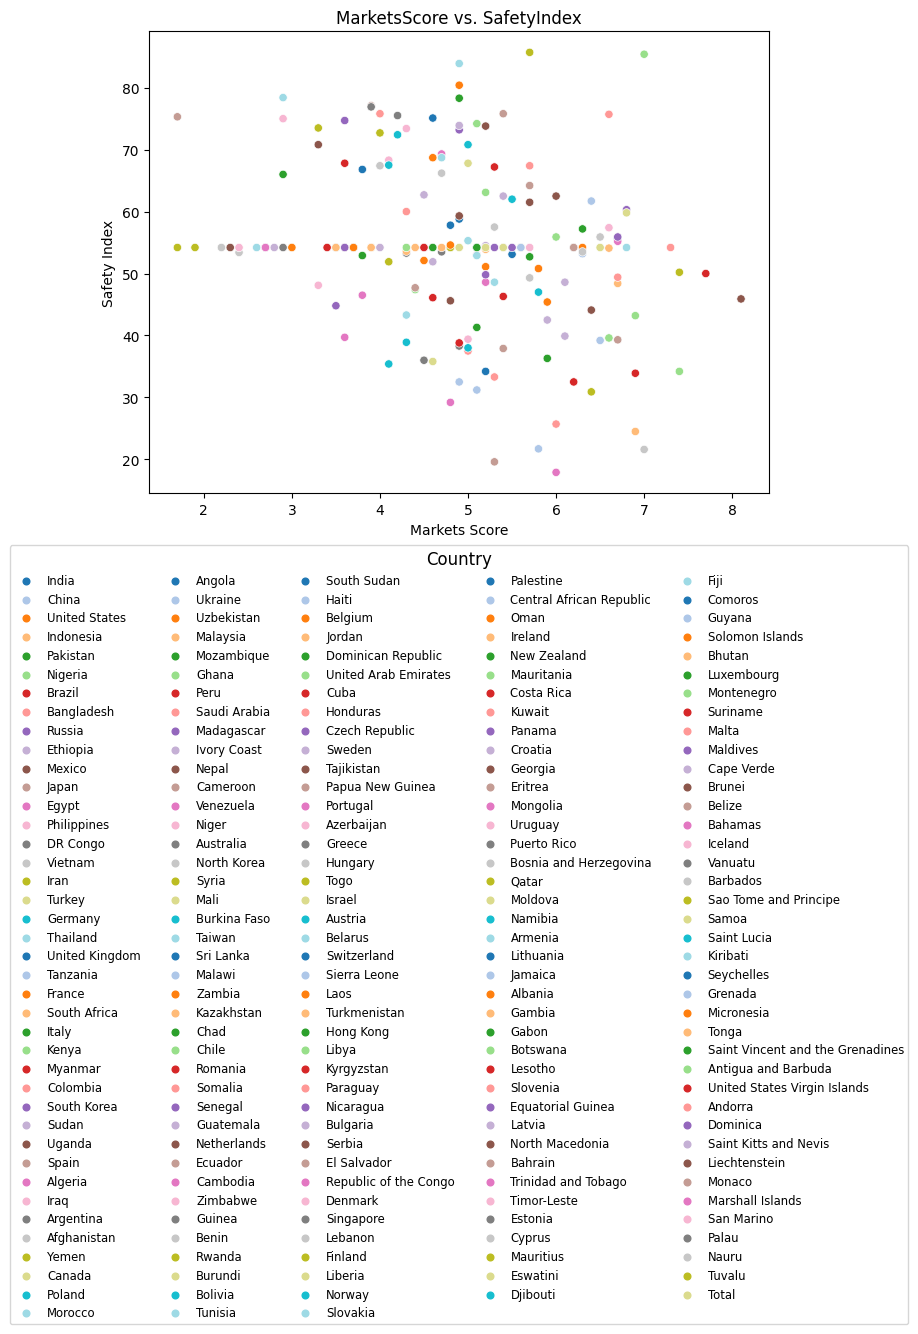

In [35]:
# Scatter plot between CrimeIndex and ResilienceScore
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CrimeIndex', y='ResilienceScore', hue='Country', palette='tab20', legend='full')
plt.title('CrimeIndex vs. ResilienceScore')
plt.xlabel('Crime Index')
plt.ylabel('Resilience Score')
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize='small', title_fontsize='large', markerscale=0.8, ncol=5)  # Horizontal legend
plt.tight_layout()
plt.show()

# Scatter plot between CriminalityScore and SafetyIndex
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CriminalityScore', y='SafetyIndex', hue='Country', palette='tab20', legend='full')
plt.title('CriminalityScore vs. SafetyIndex')
plt.xlabel('Criminality Score')
plt.ylabel('Safety Index')
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize='small', title_fontsize='large', markerscale=0.8, ncol=5)  # Horizontal legend
plt.tight_layout()
plt.show()

# Scatter plot between MarketsScore and SafetyIndex
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MarketsScore', y='SafetyIndex', hue='Country', palette='tab20', legend='full')
plt.title('MarketsScore vs. SafetyIndex')
plt.xlabel('Markets Score')
plt.ylabel('Safety Index')
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize='small', title_fontsize='large', markerscale=0.8, ncol=5)  # Horizontal legend
plt.tight_layout()
plt.show()

**The plots above provide insights into the relationships between various metrics:**
- **CrimeIndex vs. ResilienceScore**: This comparison helps us explore whether areas with higher crime rates tend to have lower resilience scores, which could indicate a potential vulnerability to social challenges or instability.
- **CriminalityScore vs. SafetyIndex**: By analyzing this relationship, we aim to determine if higher criminality scores are associated with lower safety perceptions, suggesting a possible link between crime rates and public safety concerns.
- **MarketsScore vs. SafetyIndex**: This analysis investigates whether regions with better market conditions (as indicated by the MarketsScore) are correlated with higher safety levels, which could imply that stronger economic conditions contribute to a safer environment.

### 3.2 Correlation Heatmap
**Correlation analysis can be performed between numerical columns. A heatmap helps visualize the strength of the relationships between different variables. A higher correlation indicates a stronger relationship, while a lower correlation (or negative correlation) indicates a weaker or inverse relationship**

Correlation Matrix:
                  CrimeIndex  CriminalityScore  MarketsScore  ActorsScore  \
CrimeIndex          1.000000          0.327376      0.247459     0.369276   
CriminalityScore    0.327376          1.000000      0.947570     0.961042   
MarketsScore        0.247459          0.947570      1.000000     0.823620   
ActorsScore         0.369276          0.961042      0.823620     1.000000   
ResilienceScore    -0.415564         -0.442899     -0.350232    -0.489219   
SafetyIndex        -0.999990         -0.327387     -0.247456    -0.369277   

                  ResilienceScore  SafetyIndex  
CrimeIndex              -0.415564    -0.999990  
CriminalityScore        -0.442899    -0.327387  
MarketsScore            -0.350232    -0.247456  
ActorsScore             -0.489219    -0.369277  
ResilienceScore          1.000000     0.415564  
SafetyIndex              0.415564     1.000000  


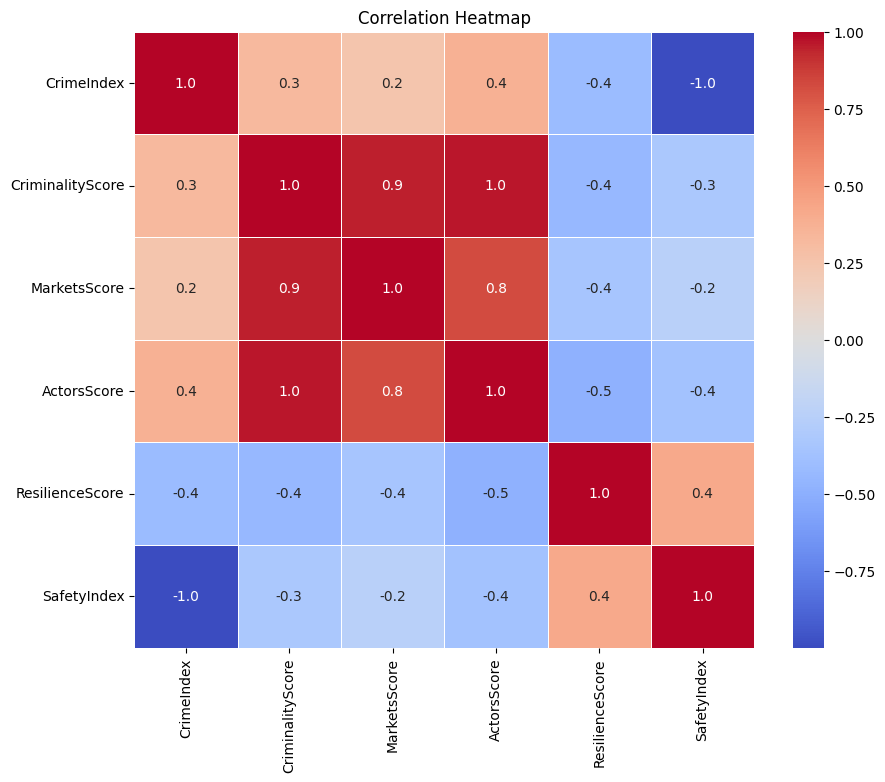

In [40]:
# Compute correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr() # Only use numeric columns

# Check the correlation matrix 
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3.3 Clustering 
**Using crime index, criminality score, and safety index for clustering by KMeans algorithm.**

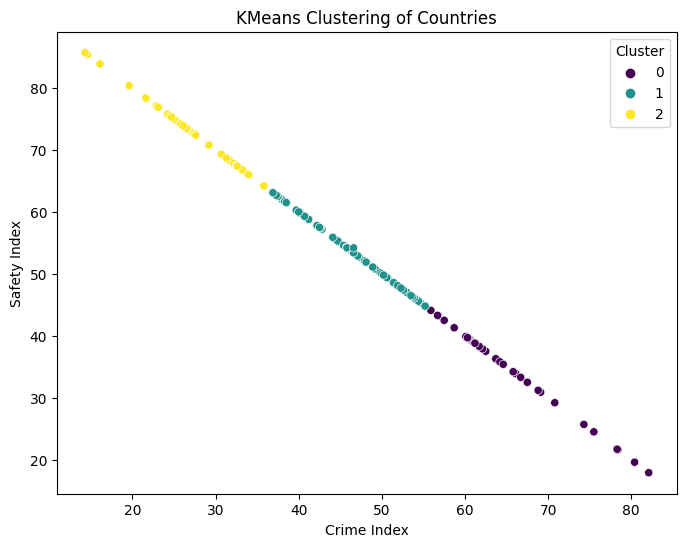

In [44]:
X = df[['CrimeIndex', 'CriminalityScore', 'SafetyIndex']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

df['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CrimeIndex', y='SafetyIndex', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering of Countries')
plt.xlabel('Crime Index')
plt.ylabel('Safety Index')
plt.show()

**The plot displays the countries grouped into three clusters, with each cluster represented by a distinct color. The KMeans algorithm has categorized the countries based on their levels of crime and safety.**

## 4. Merging the Data with a Geospatial World Map
**This process involves combining crime data with a world map, using country names as the key for merging. The result is a visual representation where each country is colored based on its respective crime rate, allowing for an easy comparison of crime rates across different regions of the world.**

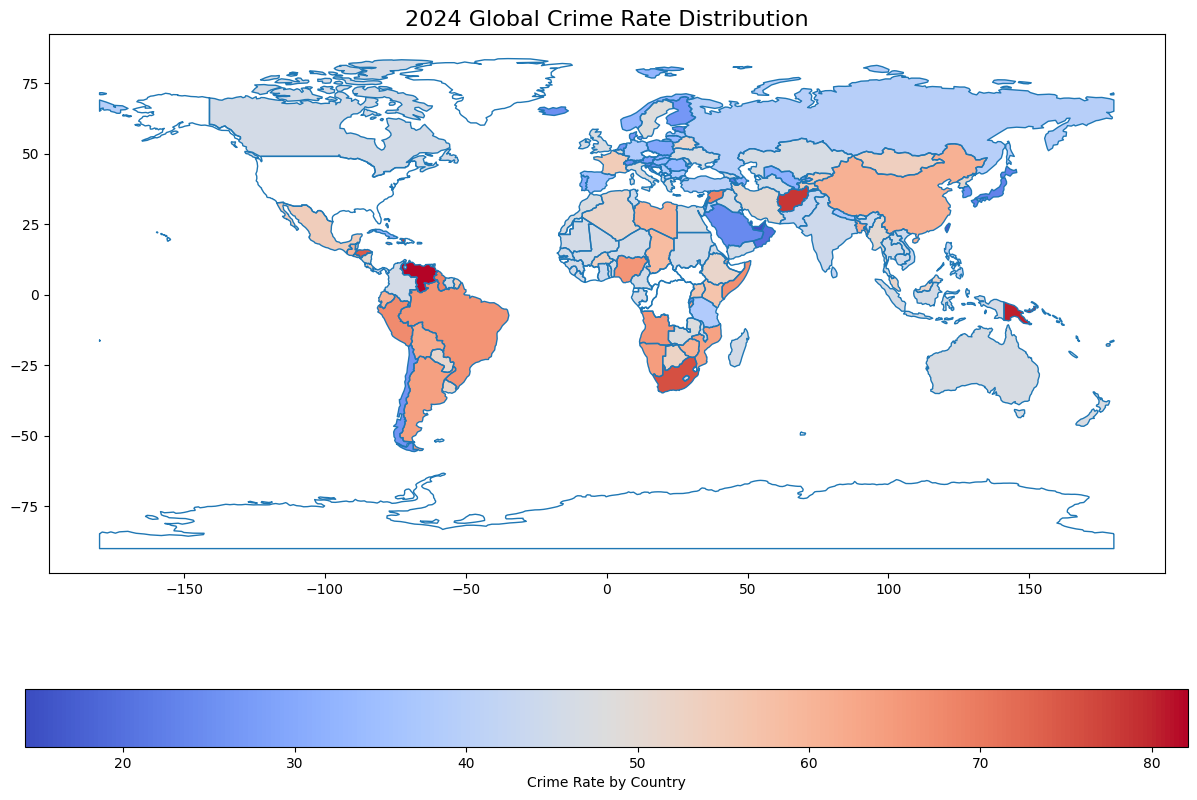

In [46]:
# Select relevant columns for crime data: Country and CrimeInde
crime_data = df[['Country', 'CrimeIndex']]

# Load the world map shapefile using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with your crime data based on country names
world = world.merge(crime_data, how="left", left_on="name", right_on="Country")

# Plot the world map, coloring by CrimeRate (CrimeIndex in your case)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='CrimeIndex', ax=ax, legend=True,
           legend_kwds={'label': "Crime Rate by Country",
                        'orientation': "horizontal"},
           cmap='coolwarm')

ax.set_title('2024 Global Crime Rate Distribution', fontsize=16)
plt.show()